***
# CoNetz
***
## HIGHLIGHTS
This submission used the power of network based analysis for rapid identification of potential new drugs and vaccines. Text and network mining techniques are employed to build a comprehensive network of relations between a vast variety of biological entities. The tools allow easy exploration and visualization of the network for generation of leads. The submission utilizes both the CORD-19 corpus as well as all of MEDLINE.

 

Some of the immediate insights derived in the context of COVID 19:
1. Drugs such as Ciclesonide, Selamectin, Baricitinib, Fedratinib, Tocilizumab, Arbidol and Chloroquine, as well as Convalescent plasma therapy.
2. Prominent alternative medicines such as Astragali radix, Shufeng jiedu and Lianhuaqingwen.
3. Novel leads for re-purposing including Ingavirin (pentanedioic acid-imidazolyl ethanamide combination), Pocapavir, R 125489 (Laninamivir), Peficitinib (an oral Janus Kinase Inhibitor) and Paritaprevir.

Several use cases to explore leads are illustrated. We encourage the community to leverage the power of this network and its easy to use Python interface, for this task and beyond.

## INTRODUCTION
Since the outbreak of the COVID-19 pandemic, there has been a massive pursuit by the research community to find drugs to treat this disease as well as discover vaccines against the disease. A large number of research papers have been published to this end, peer-reviewed as well as those posted in preprint repositories such as bioRxiv (www.bioRxiv.org) and medRxiv (www.medRxiv.org). In addition, a large number of peer-reviewed papers on earlier coronavirus-related diseases such as SARS and MERS are also available.

The COVID-19 Open Research Dataset (CORD-19 corpus) consists of abstracts and full-text articles on COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community via this Kaggle challenge to apply recent advances in natural language processing (NLP) and other related techniques to generate insights in support of the ongoing fight against this infectious disease.

At a specific level, it means we have to help uncover **"*unknown known*"** entities such as drugs and vaccines that are maybe unknown to the larger set of researchers but mentioned in specific scientific article(s) part of the CORD-19 dataset. Our goal is to help the medical research community uncover these "unknown known" entities through a combination of text-mining and network analyses.

## APPROACH SUMMARY
### Association Network Creation
We had earlier built a framework for NLP called TPX, a web-based text-mining tool that supports real-time entity assisted search and navigation of the MEDLINE repository whilst continuing to use PubMed as the underlying search engine **(1)**. TPX is a modular and versatile biomedical text-mining framework. For instance, we recently built PRIORI-T **(2)**, a pipeline for phenotype-driven rare disease gene prioritization, by re-purposing specific modules of TPX. The modules include:
1. Dictionary Curation module
2. Annotator for entity annotations
3. MEDLINE Processor
4. Network Creation module, to build a heterogeneous network of the correlations extracted by the Correlation Extraction module
5. Network Augmentation module, to augment the network with novel links inferred using a graph convolution-based approach

We re-purposed TPX for the COVID-19 Open Research Dataset Challenge (CORD-19) as follows:
1.  We took the provided CORD19 dataset corpus and filtered these for unique full-text articles. We used the Corpus Processor module of TPX to process this corpus. We also considered the complete MEDLINE abstracts which was used by the network augmentation module to augment the network with inferred novel connections.
2.  The Annotator module of TPX performed the annotation on the corpus based on the following dictionaries: HUMAN_GENE, GENE_SARS, GENE_MERS, GENE_COVID, PHENOTYPE, CHEMICALS, DRUGS, DISEASE, SYMPTOM, GOPROC, GOFUNC, GOLOC, CELLTYPE, TISSUE, ANATOMY, ORGANISM, COUNTRIES, ETHICS TERMS (general terms related to human ethics), NON-PHARMA INTERVENTION (terms related to non-pharmaceutical intervention), SURVEILLANCE TERMS (general terms related to disease surveillance), VACCINE TERMS, VIROLOGY TERMS (general terms used in virology studies) and EARTH SCIENCE TERMS.
3.  We then used the Correlation Extraction module to extract out correlations amongst these entity types and
4.  These correlations extracted by the Correlation Extraction module are then used by the Network Creation module to build a network called **TCS\_COVID\_NETWORK**. This network can is queried to obtain information and pointers from the corpus.

Thus, the TCS\_COVID\_NETWORK serves as a knowledge base that could help the COVID-19 research community to obtain pointers for useful relations spanning several entity types through a combination of text-mining and network analyses. We have uploaded the network in Kaggle for download and use by the community for solving some of text mining related questions that are posed in this Kaggle challenge

### PyVis Visualization
We then used PyVis, a Python-based library for constructing and visualizing an intuitive and interactive exploration of TCS\_COVID\_NETWORK. The Jupyter notebook provides details on this. For instructive purpose and to exhibit the utility of the network-based approach, we have included a set of use cases. These use cases show different ways of exploring the network using PyVis and NetworkX library to find useful insights. These cases are by no means exhaustive. However, the PyVis and NetworkX functionalities can be easily used to provide and/or build richer exploration features using our underlying network.

The Figure below depicts the overall approach.

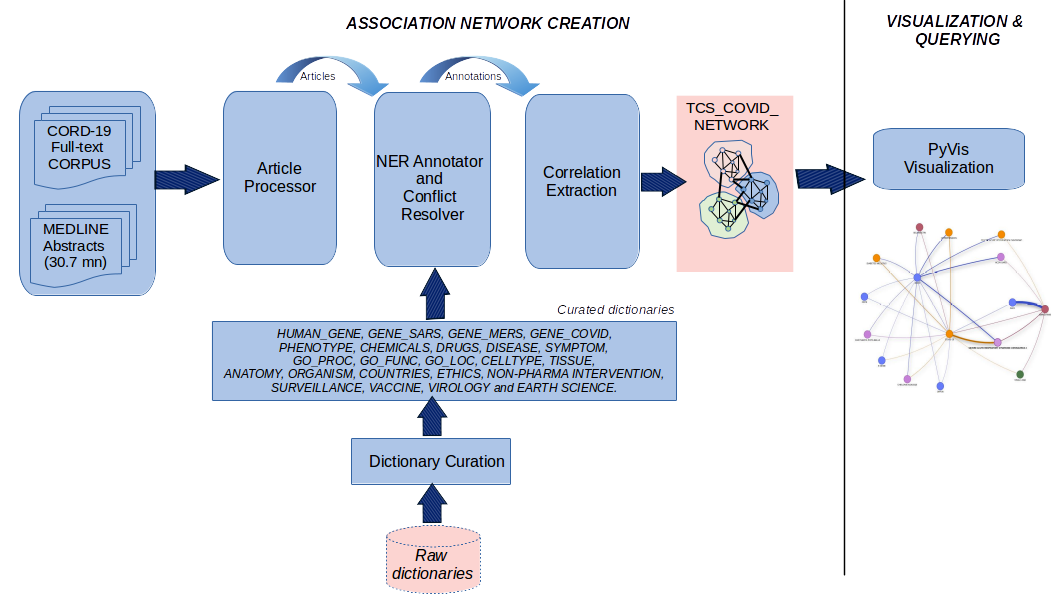

## APPROACH DETAILS
### Corpus preprocessing and augmentation

**CORD-19 corpus preprocessing**
As part of the corpus-preprocessing we removed unwanted characters such as white spaces and html codes. We de-duplicated the corpus to remove duplicate articles.

**Incorrectly annotated COVID19 articles:**: We found that the sentence *"publicly funded repositories, such as the WHO COVID database with rights for unrestricted research re-use and analyses in any form or by any means with acknowledgement of the original source. These permissions are granted for free by Elsevier for as long as the COVID-19 resource centre remains active."* was included at the begining of 380 articles sourced from Elsevier in the corpus. Many of these articles are actually not relevant to COVID-19 and seem to have come into the corpus because of this one sentence. In such articles, there is only a single mention of COVID-19 in the above sentence. We removed this sentence from the articles.

While in the previous version of our submission, only the "title" and "abstract" sections, we now process the COMPLETE corpus of full-text of articles. Only **Foreign Language Articles** were excluded from the corpus. The CORD-19 corpus contains full-text foreign language articles, including those in Spanish, French and German. While these did not adversely affect the overall quality of TCS\_COVID\_NETWORK, a few false-positives were observed. Hence, we excluded a total of 854 such foreign language articles.

After the clean-up, we segregated the article text into various spans, which included sentence, section, paragraph and the full article.

**Augmenting the corpus with related MEDLINE abstracts**: While the provided CORD-19 corpus is an excellent source of COVID-19 articles, we experimented to see if there are any related MEDLINE abstracts that could possibly be added to the corpus to improve the precision and recall. Towards this, we filtered the entire tagged MEDLINE for abstracts containing the terms "coronavirus infection", SARS, MERS or COVID-19 or their synonyms. As a result, we identified a subset of MEDLINE abstracts that could be used to augment the CORD-19 corpus. **To reiterate**: the provided CORD-19 corpus is the principal data source for our submission. However, we found additional useful COVID-19 related abstracts in MEDLINE.

### NER Annotator
We used lexicon (dictionary)-based NER annotator to tag the text. The annotator takes care of local abbreviations.

After tagging, we used the **Conflict Resolver** to resolve conflicts arising from the same text getting annotated by different dictionaries. The order followed was "DISEASE" > "SYMPTOM" > "PHENOTYPE" > "HGNC" > "GENE-COVID" >"GENE-SARS" >"GENE-MERS" > "VACCINETERMS" > "DRUGS" > "CHEMICALS" > "GO_PROCESS" > "GO_FUNCTION" > "GO_LOCATION" > "CELLTYPE" > "TISSUE" > "ANATOMY" > "VIROLOGYTERMS" > "NONPHARMAINTERVENTIO" > "SURVEILLANCETERMS" > "ETHICSTERMS" > "COUNTRIES" > "EARTHSCIENCETERMS"

### Correlation Extraction
The Correlation Extraction module uses the Pearson correlation coefficient to compute pairwise correlations between entities identified by the Annotator. To compute the pair-wise correlation for a pair, we used the standard Pearson correlation expression. These probability values are estimated from the corpus. We experimented with computing pair-wise correlations using different text spans: sentence, paragraph, section and article. Based on our evaluation, we found the correlations computed at the paragraph level to strike a good balance of precision and recall. We used these associations to build the basic TCS\_COVID\_NETWORK. Here, the biological entities are the nodes and the pair-wise correlations are represented using undirected weighted edges where the edge weight corresponds to the correlation strength.

### Network Augmentation
The correlation-based network was further augmented with additional inferred novel links using a graph convolution based technique. These links have no co-occurrence-based support from the corpus. However, such novel links are equally crucial in identifying important drugs, genes etc.,for the drug development, repurposing and vaccine development tasks. We had previously developed a graph convolution-based association inferencing algorithm GCAS (Graph Convolution based Association Scoring) in the context of network-based study of rare-diseases **(3)**. Our approach is motivated by the recent progress in spectral graph convolutions, where association inferencing is viewed as a mult-step signal propagation over the network by convolving the network with a filter.

One of the primary goals of our submission is to provide a high quality and a user friendly network-based abstraction of the given corpus to explore interesting connections between several entity types. However, capturing novel connections are equally crucial for identifying useful targets for drugs and vaccines. We believe that to achieve this, we need to go beyond the provided corpus and consider the complete MEDLINE and other data sources. Our network augmentation task is a step in this direction. Our final framework would thus capture highly relevant relations from COVID-19 related corpus and would also mine for additional novel associations from the whole of MEDLINE. Both these knowledge bases are then combined to complement each other so as to amplify the signal and to reduce the overall noise.

In the current submission, we have combined these knowledge bases (networks) in a simple manner. We however exhibit its use through some interesting use cases. Future submissions would provide enhancements to improve the overall quality.

## RESULTS
We now describe how this network can be used to answer some of the questions posed in the challenge using a network exploration  and PyVis visualization approach.

Install needed packages

In [ ]:
!pip install pyvis

Import all the needed python libraries

In [ ]:
from pyvis.network import Network
import networkx as nx
import pandas as pd
from IPython.display import IFrame

Define global variables

In [ ]:
from pyvis.network import Network
import networkx as nx
import pandas as pd
import sys

VERSION_DIR='/kaggle/input/cord19/drug_submission_v2.3/'
CONETZ_NETWORK_FILE = VERSION_DIR+'conetz.tsv'
CONETZ_SP_NETWORK_FILE = VERSION_DIR+'conetz_specialized.tsv'
NETWORK_FILE = CONETZ_SP_NETWORK_FILE
ENTITY_NAME_FILE = VERSION_DIR+'resources/entity_name.tsv'
ENT_METADATA_FILE = VERSION_DIR+'resources/entity_metadata.csv'
ent_name=None
ent_id_name=None
ent_name_id={}
enttype_map=None
ent_cmap=None
ent_srcmap=None
connected_nodes=False
notebook_mode=True
overlap_ents=None
net_options = {
  "nodes": {
    "borderWidth": 0,
    "borderWidthSelected": 1,
    "scaling": {
      "min": 46
    }
  },
  "edges": {
    "color": {
      "inherit": True
    },
    "shadow": {
      "enabled": True
    },
    "smooth": True
  },
  "interaction": {
    "hover": True,
    "navigationButtons": True
  },
  "physics": {
    "enabled": True,
    "forceAtlas2Based": {
      "gravitationalConstant": -208,
      "springLength": 30
    },
    "minVelocity": 0.05,
    "timestep":0.1,
    "solver": "forceAtlas2Based"
  }
}

Helper Functions

In [ ]:
def getEntityMaps():
    ent_meta_map = pd.read_csv(ENT_METADATA_FILE, sep=',')
    enttype_map = ent_meta_map[['entid','enttype','entsource']]
    
    ent_name_df = pd.read_csv(ENTITY_NAME_FILE, sep='\t', converters={'TypeId':str})
    ent_name_df.TypeId=ent_name_df.TypeId.str.upper()
    ent_name_df.Synonym=ent_name_df.Synonym.str.upper()
    ent_name_df.DictId = ent_name_df.DictId.map(enttype_map.set_index('entid')['enttype'])
    
    ent_name = ent_name_df.set_index('Synonym').to_dict()
    overlap_ents = ent_name_df[ent_name_df.Synonym.isin(ent_name_df.Synonym[ent_name_df.Synonym.duplicated()])]
    ent_id_name = ent_name_df.set_index(['TypeId','DictId']).to_dict()
    
    ent_color = ent_meta_map[['enttype','entcolor']]
    ent_cmap = ent_color.set_index('enttype').to_dict(orient='index')
    
    ent_source = ent_meta_map[['enttype','entsource']]
    ent_srcmap = ent_source.set_index('enttype').to_dict(orient='index')
    return enttype_map, ent_name, ent_id_name, overlap_ents, ent_cmap, ent_srcmap

def getNetwork():
    nw = pd.read_csv(NETWORK_FILE,sep='\t',converters={'src_ent':str, 'target_ent':str})
    nw.src_type = nw.src_type.map(enttype_map.set_index('entid')['enttype'])
    nw.target_type = nw.target_type.map(enttype_map.set_index('entid')['enttype'])
    nw.src_ent=nw.src_ent.str.upper()
    nw.target_ent=nw.target_ent.str.upper()
    return nw

def buildQueryCriteria(src_ents, source_ent_types=None, target_ents=None, target_ent_types=None, 
                       queryByEntityName=True, topk=50, topkByType=None, connected_nodes=False, 
                       indirect_links=None, inference=False):
    # Normalize it upper-case
    src_ents = [i.strip().upper() for i in src_ents]
    
    criteria = {'src_ents' : src_ents,
                'src_ent_types': source_ent_types,
                'target_ents': target_ents,
                'target_ent_types': target_ent_types,
                'query_entname' : queryByEntityName,
                'topk' : topk,
                'topkByType' : topkByType,
                'connected_nodes' : connected_nodes,
                'indirect_links' : indirect_links,
                'inference':inference
                }
    return criteria

def queryByEntityTypes(nw, src_ent_types, target_ent_types):
    #Fetch the network
    qnw=None
    if(src_ent_types is not None):
        qnw = nw[nw.src_type.isin(src_ent_types)]
    if(target_ent_types is not None):
        qnw = nw[nw.target_type.isin(target_ent_types)]
    if(qnw is None):
        qnw=nw
    return qnw

def queryByEntityID(nw, src_ents, target_ents=None):
    #Fetch the network
    qnw = nw[nw.src_ent.isin(src_ents)]
    if(target_ents is not None):
        target_ents = [i.strip().upper() for i in target_ents]
        qnw = nw[nw.target_ent.isin(target_ents)]
    return qnw

def getEntityIds(ents):
    # Normalize it upper-case
    for i in ents:
        if(i not in ent_name['TypeId']):
            print('Term Error : Oops! Query term ['+i+'] NOT Found ')
            print('Suggestion : Please use Type ID as query from the source DB stated in the metadata OR remove the term')
            sys.exit(0)
        ov = overlap_ents[overlap_ents.Synonym==i]
        if len(ov)>1:
            print('Entity Conflict Error : Oops! Found more than one entity type for the query term '+i)
            print('Suggestion : Please use one of the following Type IDs as query to resolve the conflict \n\tand search by setting QueryByName=False : ')
            for idx in ov.index:
                print('\tFor '+ov.DictId[idx]+' Dictionary; use : QueryTerms=[\''+ov.TypeId[idx]+'\']')
            sys.exit(0)
    
    print(' Querying by Entity Name ..')
        
    #Get the entity triplet for the entities
    typeids = [ent_name['TypeId'][i] for i in ents]
    dictids = [ent_name['DictId'][i] for i in ents]
    #Update Entity Name to Entity/Node ID for reference
    for i in range(len(ents)):
        ent_name_id[ents[i]]=getNodeID(typeids[i], dictids[i])
    return typeids, dictids


def queryByEntityName(nw, src_ents, target_ents=None):
    typeids, dictids = getEntityIds(src_ents)
    qnw = nw[nw.src_ent.isin(typeids) & (nw.src_type.isin(dictids))]
    if(target_ents is not None):
        target_ents = [i.upper() for i in target_ents]
        typeids, dictids = getEntityIds(target_ents)
        
        qnw = nw[(nw.src_ent.isin(typeids)) & (nw.src_type.isin(dictids))]
    return qnw

def queryTopk(nw, topk, topkByType):
    qnw=None
    if(topkByType!=None):
        qnw = nw.groupby(['src_ent','target_type']).head(topkByType)
    else:
        qnw = nw.groupby(['src_ent','target_type']).head(topk)
    return qnw

def queryInferredEdges(nw):
    qnw = nw[nw.debug=='I']
    return qnw

def queryNetwork(nw, criteria):
    # Use the criteria to query the network by entity name
    qnw=None
    
    if(criteria['query_entname']==True):
        qnw = queryByEntityName(nw, criteria['src_ents'], target_ents=criteria['target_ents'])
    else:
        qnw = queryByEntityID(nw, criteria['src_ents'], target_ents=criteria['target_ents'])
    
    # Display only inferred edges
    if(criteria['inference']==True):
        qnw = queryInferredEdges(qnw)
    else:
        qnw = qnw[qnw.debug!='I']
    
    # Query by entity types
    qnw = queryByEntityTypes(qnw, criteria['src_ent_types'], criteria['target_ent_types'])
    
    # Display only Top-k entites
    qnw = queryTopk(qnw, criteria['topk'], criteria['topkByType'])
    
    return qnw

def getEntityNames(src, target):
    src_name = ent_id_name['Synonym'][src]
    target_name = ent_id_name['Synonym'][target]
    return src_name, target_name

def getNodeID(typeid, dictid):
    return typeid+'-'+dictid[:2]

def buildNodeAttributes(e):
    # Build Node attributes - node_id, node_label, node_title, node_color 
    src_label, target_label = getEntityNames((e[0],e[1]), (e[2],e[3]))
    
    # Build src node
    src_id = getNodeID(e[0], e[1])
    src_title="<b>"+src_label+"</b><br><i>"+e[1]+"<br>"+e[0]+"</i><br>"+ent_srcmap[e[1]]['entsource']
    src_color=ent_cmap[e[1]]['entcolor']
    
    # Build target node
    target_id = getNodeID(e[2], e[3])
    target_title="<b>"+target_label+"</b><br><i>"+e[3]+"<br>"+e[2]+"</i><br>"+ent_srcmap[e[3]]['entsource']
    target_color=ent_cmap[e[3]]['entcolor']
    
    return (src_id, src_label, src_title, src_color), (target_id, target_label, target_title, target_color)

def edgeAttributes(ent1, ent2, edge_props):
    #Build edge attributes
    edge_title = '<b>'+ent1+' --- '+ent2+'</b><br>Article Evidence(s) :<br>'
    
    if('I' in edge_props):
        num_arts=0
        edge_title+='<b>Inferred from GCAS </b></i>'
    else:
        edge_prop_arr = edge_props.split(sep=',')
        num_arts = int(edge_prop_arr[0])-3
        art_type=''
        for i in range(3, len(edge_prop_arr)):
            art=edge_prop_arr[i].replace("[","")
            art=art.replace("]","")
            if("FT_" in art):
                art=art.replace("FT_","")
                art_type='CORD_UID :'
            else:
                art_type='PUBMED_ID :'
            edge_title+=art_type+'<i>'+art+'</i><br>'
        if(num_arts>5):
            edge_title+='and <i><b>'+str(num_arts)+'</b> more articles ...</i>'
    
    return edge_title

def buildGraph(G, criteria, filters=False):
    #Define Network layout
    net = Network(height="1024px", width="100%", bgcolor="white", font_color="black", notebook=notebook_mode)
    net.options=net_options
    
    #Convert networkx G to pyvis network
    edges = G.edges(data=True)
    nodes = G.nodes(data=True)
    if len(edges) > 0:
        for e in edges:
            snode_attr=nodes[e[0]]
            tnode_attr=nodes[e[1]]            
            net.add_node(e[0], snode_attr['label'], title=snode_attr['title'], color=snode_attr['color'])
            net.add_node(e[1], tnode_attr['label'], title=tnode_attr['title'], color=tnode_attr['color'])
            if(criteria['inference']==True):
                net.add_edge(e[0], e[1], width=2, title=e[2]['title'])
            else:
                net.add_edge(e[0], e[1], value=e[2]['value'], title=e[2]['title'])
    return net    

def applyGraphFilters(G, criteria):
    
    fnodes={}
    # Filter1 - Connected nodes
    if(criteria['connected_nodes']):    
        bic = nx.biconnected_components(G)
        for i in bic:
            if(len(i)>2):
                fnodes=i.union(fnodes)
    
        # Get the sub-graph after applying the filter(s)
        G=G.subgraph(fnodes)
    
    # Filter2 - 'indirect_links'
    il_dicts = criteria['indirect_links']
    if(il_dicts is not None):    
        snode = il_dicts['source_node'] if ('source_node' in il_dicts) else criteria['src_ents'][0]
        snode = ent_name_id[snode.upper()]
        #Depth=Hops+1
        depth=(il_dicts['hops']+1) if('hops' in il_dicts) else 2
        
        if('target_nodes' in il_dicts):
            tnodes = il_dicts['target_nodes']
        elif(criteria['target_ents'] is not None):
            tnodes = criteria['target_ents']
        else:
            tnodes=criteria['src_ents']        
        tnodes = [ ent_name_id[i.upper()] for i in  tnodes]
    
        # Traverse k-hops from source to target nodes.            
        paths_between_generator = nx.all_simple_paths(G, source=snode, target=tnodes, cutoff=depth)
        indirect_paths=[]
        i=0
        for k, path in enumerate(paths_between_generator):
            #if(len(path)==depth+1):
            ce=[]
            #print(path)
            for j, e in enumerate(path):
                if j+1 <= len(path)-1:
                    ce.append((path[j], path[j+1]))
            indirect_paths.extend(ce)
        G=G.edge_subgraph(indirect_paths)
    return G

def run(criteria):
    
    print('Building CoNetz from '+NETWORK_FILE)
    
    # Load the entire network
    nw_df = getNetwork()

    # Query the network with the defined search criteria
    qnw = queryNetwork(nw_df, criteria)
    
    # Build association network using the query result
    sources = qnw['src_ent']
    source_types=qnw['src_type']
    targets = qnw['target_ent']
    target_types=qnw['target_type']
    weights = qnw['score']
    stats = qnw['debug']
    edge_data = zip(sources, source_types, targets, target_types, weights, stats)

    G=nx.Graph()
    for e in edge_data:
        snode, tnode = buildNodeAttributes(e)
        G.add_node(snode[0], label=snode[1], title=snode[2], color=snode[3])
        G.add_node(tnode[0], label=tnode[1], title=tnode[2], color=tnode[3])
        G.add_edge(snode[0], tnode[0], value=e[4], title=edgeAttributes(snode[1],tnode[1], e[5]))

    applyFilter = (criteria['connected_nodes'] or criteria['indirect_links'])
    if(applyFilter):
        G=applyGraphFilters(G, criteria)

    net = buildGraph(G, criteria, filters=applyFilter)
    if(criteria['inference']==True):
        net.options['edges']['dashes']=True
    else:
        net.options['edges']['dashes']=False

    nassocs = len(G.edges())
    print(' Number of Associations in the Network -->'+str(nassocs))
    if(nassocs==0):
        print(' No Associations found for the query, Please change your Query ')
        sys.exit(0)
    
    return net

Define your Queries - Query by Keyword (text term)

In [ ]:
# Prepare Entity Maps
enttype_map, ent_name, ent_id_name, overlap_ents, ent_cmap, ent_srcmap = getEntityMaps()
#Display Entity Types
enttype_map

***
#### Search by MeshID : Covid19 Top-15 Entities

In [ ]:
QueryTerms=['C000657245']
criteria = buildQueryCriteria(QueryTerms, topkByType=15, queryByEntityName=False)
criteria
net = run(criteria)
net.show("cord19_ex1.html")

***
#### Search by MeshID : Top-15 Drugs and Chemicals for Covid19

In [ ]:
QueryTerms=['C000657245']
criteria = buildQueryCriteria(QueryTerms,target_ent_types=['DRUGS','CHEMICALS'], topkByType=15, queryByEntityName=False)
criteria
net = run(criteria)
net.show("cord19_ex2.html")

Previously, we had highlighted Drugs Associated with COVID-19 from Literature. 
1. **Well-known** drug re-purposing candidates for COVID-19 in CoNetz include **remdesivir, hydroxychloroquine and lopinavir-ritonavir combination, as well as convalescent plasma therapy** to were seen to be strongly associated with COVID-19 disease node. 
2. **Lesser known** drug leads such as **ciclesonide, baricitinib, fedratinib, tocilizumab and arbidol** are also connected to the COVID-19 node. 
3. **Alternative medicines** mentioned in literature in the context of COVID-19 include **astragali radix, shufeng jiedu and lianhuaqingwen.** 

The Top-15 chemicals and drugs directly associated with COVID-19 disease are shown in the above **Figure**. This shows the presence of high quality association neighbors in the network within the top-K neighborhood. Let's look at evidences for some of these chemicals and drugs:

**Tocilizumab**: Supported by PMID:32240462, CORD_UID:yy7abob9, PMID:32241792, PMID:32222713, PMID:32209313 and PMID:32243501
* PMID:32209313: New therapeutic opportunities for COVID-19 patients with Tocilizumab: Possible correlation of interleukin-6 receptor inhibitors with osteonecrosis of the jaw
* PMID:32240462: Coronavirus disease 2019 (COVID-19): a clinical update. The efficacy of some promising antivirals, convalescent plasma transfusion, and tocilizumab needs to be investigated by ongoing clinical trials.

**Arbidol**: Supported by PMID:32147628, PMID:32171872, CORD_UID:zwqci59h, CORD_UID:5pfusktn, PMID:32037389, CORD_UID:7e8zlt3t
* PMID:32147628 Several drugs such as chloroquine, arbidol, remdesivir, and favipiravir are currently undergoing clinical studies to test their efficacy and safety in the treatment of coronavirus disease 2019 (COVID-19) in China; some promising results have been achieved thus far.

**Convalescent plasma**: Supported by PMID:32240549, PMID:32219429, PMID:32240462, PMID:32219428, PMID:32220178, PMID:32240545
* PMID:32219428 In this preliminary uncontrolled case series of 5 critically ill patients with COVID-19 and ARDS, administration of convalescent plasma containing neutralizing antibody was followed by improvement in their clinical status.
* PMID:32240549  The recent Coronavirus Disease 2019 (COVID-19) pandemic caused by SARS-CoV-2 has prompted not only a search for effective anti-viral treatment and spread control measures, but also a reconsideration of the use of convalescent plasma for COVID-19 treatment [5, 6].

**Chloroquine**: Supported by PMID:32219882, PMID:32217113, PMID:32219357, PMID:32074550, PMID:32179150, PMID:32212513
* PMID:32179150 Chloroquine, remdesivir, lopinavir, ribavirin or ritonavir have shown efficacy to inhibit coronavirus in vitro.

***
**Prominent Alternative Medicine Chemicals and Drugs**
* **Shufeng jiedu**, supported by articles CORD_UID:0xhho1sh, CORD_UID:k2ixwz9w, CORD_UID:msohf5oa, PMID:32037389, CORD_UID:ptnmtvzj and CORD_UID:athjtu2j
* **Lianhuaqingwen**, supported by CORD_UID:szsb1oan, CORD_UID:bep0xtxa, PMID:31996494, PMID:32205232, CORD_UID:x23ej29m and CORD_UID:h72w22rm


***
#### Search by multiple text terms : Top-15 Entities for Covid19 with Naproxen, Clarithromycin and Minocycline

In [ ]:
QueryTerms=['naproxen', 'clarithromycin', 'minocycline', 'covid-19']
criteria = buildQueryCriteria(QueryTerms, topkByType=10)
criteria
net = run(criteria)
net.show("cord19_ex3.html")

***
#### Search by text term : Connecting nodes/associations for Covid19, Naproxen, Clarithromycin and Minocycline

In [ ]:
QueryTerms=['naproxen', 'clarithromycin', 'minocycline', 'covid-19']
criteria = buildQueryCriteria(QueryTerms, topkByType=10, connected_nodes=True)
criteria
net = run(criteria)
net.show("cord19_ex4.html")

***
#### Search by text term : Top-15 Diseases and Drugs for Covid19

In [ ]:
QueryTerms=['covid-19']
criteria = buildQueryCriteria(QueryTerms,target_ent_types=['DISEASE','DRUGS'], topkByType=10)
print(criteria)
net = run(criteria)
net.show("cord19_ex5.html")

***
#### Multi-hop queries

Neighbourhood network constructed based on the query with entity terms (baricitinib, covid-19 and ace2) and with three additional filters, namely,
1. Only entity types ( 'HGNC','DRUGS','GENE_SARS-CoV-2','ORGANISM', 'CHEMICALS', 'VIROLOGY TERMS', 'DISEASE'),
1. For each query entity, restrict it's neighbourhood to the Top-15 neighbours for each of the filtered entity types and
1. Retain only those entities in the neighbourhood that appear in a multi-hop (simple) path (no more than 3 hops) from 'covid-19' to 'baricitinib'.

In [ ]:
QueryTerms=['baricitinib','covid-19', 'ace2']
criteria = buildQueryCriteria(QueryTerms, topkByType=15, target_ent_types=['HGNC','DRUGS','GENE_SARS-CoV-2','ORGANISM', 'CHEMICALS', 'VIROLOGY TERMS', 'DISEASE'],
                              indirect_links={'source_node':'covid-19', 'target_nodes':['baricitinib'], 'hops':3})
criteria
net = run(criteria)
net.show("cord19_ex6.html")

***
#### Using Sub-Networks to understand Drug mechanisms and Disease action

We now show the utility of connections between different entity types using sub-networks. These could provide a deeper understanding of drug mechanisms, disease action etc. An important caveat to analysing such sub-networks - each edge or connection was derived from a particular paragraph of the article(s) in the corpus - hence the correlation is only in that context.

Let's take the example where we look for connections between the drug azithromycin, non-structural proteins - Nsp8, Nsp15, human mitochondrial ribosomal protein S27 (MRPS27) and their possible role in viral repliction/viral genome replication: 

In [ ]:
QueryTerms=['C000657245','D017963', 'NS8_WCPV', 'GO:0019079', 'HGNC:14512']
criteria = buildQueryCriteria(QueryTerms, topkByType=20, queryByEntityName=False, connected_nodes=True)
criteria
net = run(criteria)
net.show("cord19_ex7.html")

Correlations from the full-text article **"38d6gb7o"** from the CORD-19 corpus show:
* **Azithromycin---COVID-19**
"Similarly, antibiotics like azithromycin have also been mooted as treatments for COVID-19."
"While this too remains to be demonstrated, we note that Azithromycin has off-target activity against human mitochondrial ribosomes, components of which interact with the SARS-CoV-2 Nsp8 protein (MRPS5, MRPS27, MRPS2, and MRPS25)."
* This second sentence also gives us **Azithromycin---mitochondrial ribosomes, Azithromycin---MRPS27** and **Nsp8---MRPS27** edges
* Finally, viral replication---COVID-19 is got from the paragraph ".................stress granules and host translation shutoff 55 . This functionality seems to benefit viral ....are targeted by several SARS-CoV-2 viral proteins. Interestingly, ...  ....stress granules and host translation shutoff. This functionality seems to benefit viral replication, as stress granules are inhibitory to replication of MERS-CoV 56 and other viruses"

A separate search of PubMed results in some abstracts not in the corpus that support the correlations mentioned above:
* From **PMID:32229706**: "Similarly, two proposed therapeutics for the treatment of COVID-19 infection are **Azithromycin** and Quercetin, both drugs with significant senolytic activity. As Azithromycin and Doxycycline are both commonly used antibiotics that **inhibit viral replication** and IL-6 production, we may want to consider this general class of antibiotics that functionally inhibits cellular protein synthesis as a side-effect, for the treatment and prevention of COVID-19 disease."
* From **PMID:30918070**: "Replacement of a conserved Lys residue with Ala abolished the in vitro RNA-binding and TATase activities of **nsp8** and caused a nonviable phenotype when the corresponding mutation was introduced into the HCoV-229E genome, confirming that these activities are mediated by **nsp8** and critical for **viral replication**. While confirming the critical role of nsp8 in coronavirus replication, the study amends the list of activities mediated by coronavirus nsp8 proteins in the absence of other proteins."
* From **PMID:30135128**: "We also hypothesize that the primase-like protein **Nsp8** and the Nsp7/**Nsp8** complex may interact with Nsp15 and affect enzymatic activity. This contributes to the understanding of the association of **Nsp15** with the **viral replication** and transcription machinery."

In [ ]:
QueryTerms=['C000657245']
criteria = buildQueryCriteria(QueryTerms, topkByType=40, queryByEntityName=False, inference=True)
criteria
net = run(criteria)
net.show("cord19_inference.html")

## Analysis of Novel Drug Predictions for COVID-19

The top-40 link-predicted drugs for COVID-19 in the network are shown in Figure 3. We investigate these drugs as potential drug re-purposing candidates for COVID-19. Towards this, we perform network exploration around some of these link-predicted drugs to understand their possible mechanisms. We also identify and describe literature evidence that could support these predictions. While we provide analysis for a few of the 40 drugs, a similar analysis can be done for all 40 or any top-K drugs of ones choice. Our goal here is to illustrate the potential of the network and also enable domain experts to explore the network to generate their own hypotheses.

We now highlight some drugs connected by indirect edges to COVID-19 disease in the network. The caveat here is that since these are not direct connections, there is no reference article that talks about them. One could think of them as putative suggestions! Some text from MEDLINE abstracts about these drugs is also shown.

**Ingavirin (pentanedioic acid - imidazolyl ethanamide drug combination)**
* PMID:27876718 states "Research objective was to study the efficacy of Ingavirin for prevention of recurrent herpetic stomatitis in employees of Kazan city industrial enterprises frequently suffering from acute respiratory viral infections. The obtained data allow to recommend ingavirin for prevention of recurrent herpetic stomatitis."
* PMID:21033471 states "Despite obvious success in the vaccine development and chemotherapy of influenza, it remains a poorly controlled infection leading to emergence of new pandemic variants of the virus with high morbidity and mortality. We investigated the protective activity of Ingavirin against the lethal influenza A (H1N1) 2009 virus infection on albino mice. Oral use of Ingavirin resulted in sharp decreasing of the mortality (index of protection up to 57%), slight decreasing of the infectious titer of the virus in the lungs ( up to 40-fold), normalizing of the body weight dynamics and the lung tissue structure vs. the placebo-treated control. The degree of the bronchial epithelium damage was also strongly decreased. The results allow to consider Ingavirin as an effective antiviral against the current pandemic influenza virus."

**Pocapavir**
* PMID:25229269 states "Pocapavir (V-073) is an investigational drug candidate being developed for poliovirus indications, but also has variable antiviral activity against nonpolio enteroviruses. We describe the first use of pocapavir in treating a case of severe neonatal enteroviral sepsis due to Coxsackievirus B3."

**R 125489 (laninamivir)**
* PMID:28869418 says "Laninamivir octanoate is a recently developed inhaled neuraminidase inhibitor for treating influenza virus infection"
* PMID:30935767 says "Four neuraminidase (NA) inhibitors and an RNA synthesis inhibitor were recently approved and are currently in clinical use for influenza. Among NA inhibitors, oseltamivir phosphate (OSE, Tamiflu®) and zanamivir are approved worldwide, whereas peramivir and laninamivir octanoate (LAN, Inavir®) are regionally approved for human use"
* PMID:22028647 says "The 2009 H1N1 influenza pandemic (pH1N1) led to record sales of neuraminidase ( NA) inhibitors, which has contributed significantly to the recent increase in oseltamivir-resistant viruses. Therefore, development and careful evaluation of novel NA inhibitors is of great interest. Recently, a highly potent NA inhibitor, laninamivir, has been approved for use in Japan."
* A recent article "PMID:32251791, A first Case of Meningitis/Encephalitis associated with SARS-Coronavirus-2"(not in the corpus) mentions Laninamivir in the context of meningitis in a COVID-19 patient.

**Peficitinib (an oral Janus Kinase Inhibitor)**
* PMID:31093950 says "Peficitinib [Smyraf® (Astellas Pharma)] is a Janus kinase (JAK)1, JAK2, JAK3 and tyrosine kinase (Tyk)2 (pan-JAK) inhibitor recently approved in Japan for the treatment of rheumatoid arthritis. Inhibition of JAK suppresses the activation of cytokine signalling pathways involved in inflammation and joint destruction in rheumatoid arthritis."
* PMID:31181818 mentions "Conclusion: Peficitinib suppressed the JAK- STAT pathway in RA FLS and also suppressed monocyte chemotaxis and proliferation of FLS through inhibition of inflammatory cytokines"

**Paritaprevir**
* PMID:32108916 says "Elimination of the virus with direct-acting antivirals (DAAs) may modify host immune response via altering these immune checkpoint receptors' expression. We conducted a prospective study to analyze changes in TIM-3, PD-1 and their ligands galectin-9, PD-L1 expression by peripheral blood T cell subpopulations, NK cell subpopulations, and monocytes by multicolor flow cytometry in 14 CHC patients successfully treated with 12 weeks of dasabuvir, ombitasvir, and paritaprevir/ ritonavir plus ribavirin.Our data suggest that DAA treatment not only inhibits viral replication but may alter host adaptive and innate immune responses."
* PMID:28680834 says "DAAs inhibit specific HCV non-structural proteins (NS) that are vital for its replication. Boceprevir, telaprevir, simeprevir, asunaprevir, grazoprevir and paritaprevir are NS3/4A inhibitors."
* In fact, a recent article "PMID:32266873, Targeting SARS-CoV-2: A Systematic Drug Repurposing Approach to Identify Promising Inhibitors Against 3C-like Proteinase and 2'-O-RiboseMethyltransferase."(not in the corpus) mentions Paritaprevir as a potential drug COVID-19, thus showing the potential value of inference!

#### For detailed analysis, please refer to our chemrxiv submission at https://chemrxiv.org/articles/Text_and_Network-Mining_for_COVID-19_Intervention_Studies/12234564

### Query the CoNetz with your own Queries

### The Code below accepts user's input and build the search criteria.  
*Copy the Below code into a code cell to execute it offline on your desktop/laptop. 
To execute the code with multiple queries, rerun the code cell using Shift+Enter*

```python

qry_str = input("Please enter the source Entities (separted by comma):\n")
qterms=qry_str.split(',')

qname = input("Query By Entity Name :[Y/N] \n")
qent_name= True if("Y"==qname.upper()) else False

print('Enter Optional parameters ')

tgt_qt = input("\t Please enter the target Entity Types (separted by comma):\n")
tent_types=tgt_qt.split(',') if(tgt_qt!='') else None

tk_str = input("\tRestrict the network to Top-k entities :(press enter for default : 15) \n")
tk = int(tk_str) if(tk_str!='') else 15

tke_str = input("\tRestrict the network to Top-k entities for each Type :] \n")
tke = int(tke_str) if(tke_str!='') else None
    
ie = input("\tShow only inferred edges from GCAS : [Y/N] \n")
inf= True if("Y"==ie.upper()) else False

cn = input("\tShow only connected nodes in the network : [Y/N] \n")
cnodes= True if("Y"==cn.upper()) else False

criteria = buildQueryCriteria(qterms, target_ent_types=tent_types, topk=tk, topkByType=tke, queryByEntityName=qent_name, inference=inf, connected_nodes=cnodes)

net = run(criteria)
net.show("cord19_user_qry.html")
```

# DISCUSSION
Our contributions are multi-fold:
1. Build a pair-wise association network covering a comprehensive set of biomedical entity types extracted from the provided corpus. We also experimented with augmenting the provided corpus with related MEDLINE abstracts.
2. Mine for novel inferred associations from the whole MEDLINE and augment the network with these to help in better identification of good drug and vaccine targets.
3. Provide an intuitive and interactive graphical exploration of the network using PyVis. We provide a Jupyter notebook for this. To illustrate the utility of the notebook, we have included a set of use cases for exploring the network using PyVis and NetworkX library.
4. To answer specific as well as general questions pertinent to this task.

The network captures associations between different entities in the augmented corpus described earlier. The network nodes correspond to the biological entities and the edges correspond to the associations. The edges are weighted where the edge weight denote the strength of association (correlation strength in this network) between the entity pair. The inferred associations from MEDLINE are also included in the network with additional flags. The entities span a comprehensive set of entity types, namely HUMAN_GENE, GENE_SARS, GENE_MERS, GENE_COVID, PHENOTYPE, CHEMICALS, DRUGS, DISEASE, SYMPTOM, GOPROC, GOFUNC, GOLOC, CELLTYPE, TISSUE, ANATOMY, ORGANISM, COUNTRIES, ETHICS TERMS, NON-PHARMA INTERVENTION, SURVEILLANCE TERMS, VACCINE TERMS, VIROLOGY TERMS and EARTH SCIENCE TERMS.

The network is compatible with the NetworkX package. User can identify a network node (biological entity) either by its "term name" or the entity ID in its source DB The ID here is its public ID as present in the public data source from which its source dictionary was built. For instance, the Human Gene dictionary was built using HGNC. Hence, in order to query for "ACE2", one could either search using the the common term name "ACE2" or its HGNC ID "HGNC:13557". We have listed the public data sources for each of the entity types which would help the user to figure out the entity ID/term name to be used for querying. There are few terms in the dictionaries that are inserted manually. These terms can be searched only by the term name. Furthermore, dictionaries for COUNTRIES, ETHICS TERMS, NON-PHARMA INTERVENTION, SURVEILLANCE TERMS, VACCINE TERMS, VIROLOGY TERMS and EARTH SCIENCE TERMS have been built from public sources as well as with some manual updates specifically for this CORD19 challenge. Hence, searching the network for these entity types can be done preferably through querying using term name rather than IDs as few of the network entities have only internal IDs and no public IDs.

An important aspect to be noted is the absence of normalization when building this network, resulting in a potential bias. This is because the provided corpus is highly specific to "COVID-19" disease articles. Though the associations are extracted based on co-occurrences of the entities in these articles, their association strength could be biased due to the limited nature of the corpus. In the subsequent releases, we would be broadening the scope of the network and also be incorporating weight normalizations based on a more comprehensive collection of articles.

In future, associations from high quality and heterogeneous curated data with sufficient coverage can be considered for augmenting the network derived solely from text-mining. These could be from sources such as IntAct **(4)**. Of course, experiments would need to be done to analyse the effects of addition of such curated associations to text-mined associations in these kinds of networks.

## REFERENCES
1. Joseph T, Saipradeep VG, Raghavan GS, Srinivasan R, Rao A, Kotte S, Sivadasan N. TPX: Biomedical literature search made easy. Bioinformation 8(12): 578-80 (2012).
2. Rao A, Vg S, Joseph T, Kotte S, Sivadasan N, Srinivasan R. Phenotype-driven gene prioritization for rare diseases using graph convolution on heterogeneous networks. BMC Med Genomics. 2018 Jul 6;11(1):57.
3. Rao A, Joseph T, Saipradeep VG, Kotte S, Sivadasan N, Srinivasan R. PRIORI-T: a tool for rare disease gene prioritization using MEDLINE. PLOS One (In Press).
4. Hermjakob H et al., IntAct: an open source molecular interaction database. Nucleic Acids Res. 2004; 32(Database issue): D452–D455.